In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
import tensorflow as tf
train_dir="/kaggle/input/foodnotfood2/archive/final"
test_dir="/kaggle/input/foodnotfood2/archive/evaluation"
train_dir, test_dir

2024-04-03 14:20:47.901088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 14:20:47.901210: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 14:20:48.055326: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


('/kaggle/input/food-not-food/food-not-food/ImageNet-Datasets-Downloader/data/train',
 '/kaggle/input/food-not-food/food-not-food/ImageNet-Datasets-Downloader/data/test')

In [2]:
total_samples = len(os.listdir(train_dir))
num_food_samples = len(os.listdir(os.path.join(train_dir, "food_augmented")))
num_non_food_samples = len(os.listdir(os.path.join(train_dir, "non_food_augmented")))
total_samples, num_food_samples, num_non_food_samples

(2, 2309, 41483)

In [3]:
(1 / num_food_samples) * (total_samples / 2.0), (1 / num_non_food_samples) * (total_samples / 2.0)


(0.00043308791684711995, 2.4106260395824795e-05)

In [4]:
weight_for_0 = (1 / num_food_samples) * (total_samples / 2.0)
weight_for_1 = (1 / num_non_food_samples) * (total_samples / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0}')
print(f'Weight for class 1: {weight_for_1}')


Weight for class 0: 0.00043308791684711995
Weight for class 1: 2.4106260395824795e-05


In [5]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(train_dir,batch_size=32,image_size=(224,223))
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=32,image_size=(224,223))
train_data, test_data

Found 43615 files belonging to 2 classes.
Found 10971 files belonging to 2 classes.


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 223, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 223, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [7]:
train_data=train_data.prefetch(tf.data.AUTOTUNE)
test_data=test_data.prefetch(tf.data.AUTOTUNE)

In [8]:
# import tensorflow as tf
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
# base_model = tf.keras.models.load_model("/Users/vrajshah1510/Documents/food-not-food/efficientnetb0_notop.h5")
# base_model.layers
base_model.trainable=False
input_layer=tf.keras.layers.Input(shape=(224,223,3))
x=base_model(input_layer)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
output_layer=tf.keras.layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(input_layer,output_layer,name="EfficientNetB0-V1")
# model_1

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


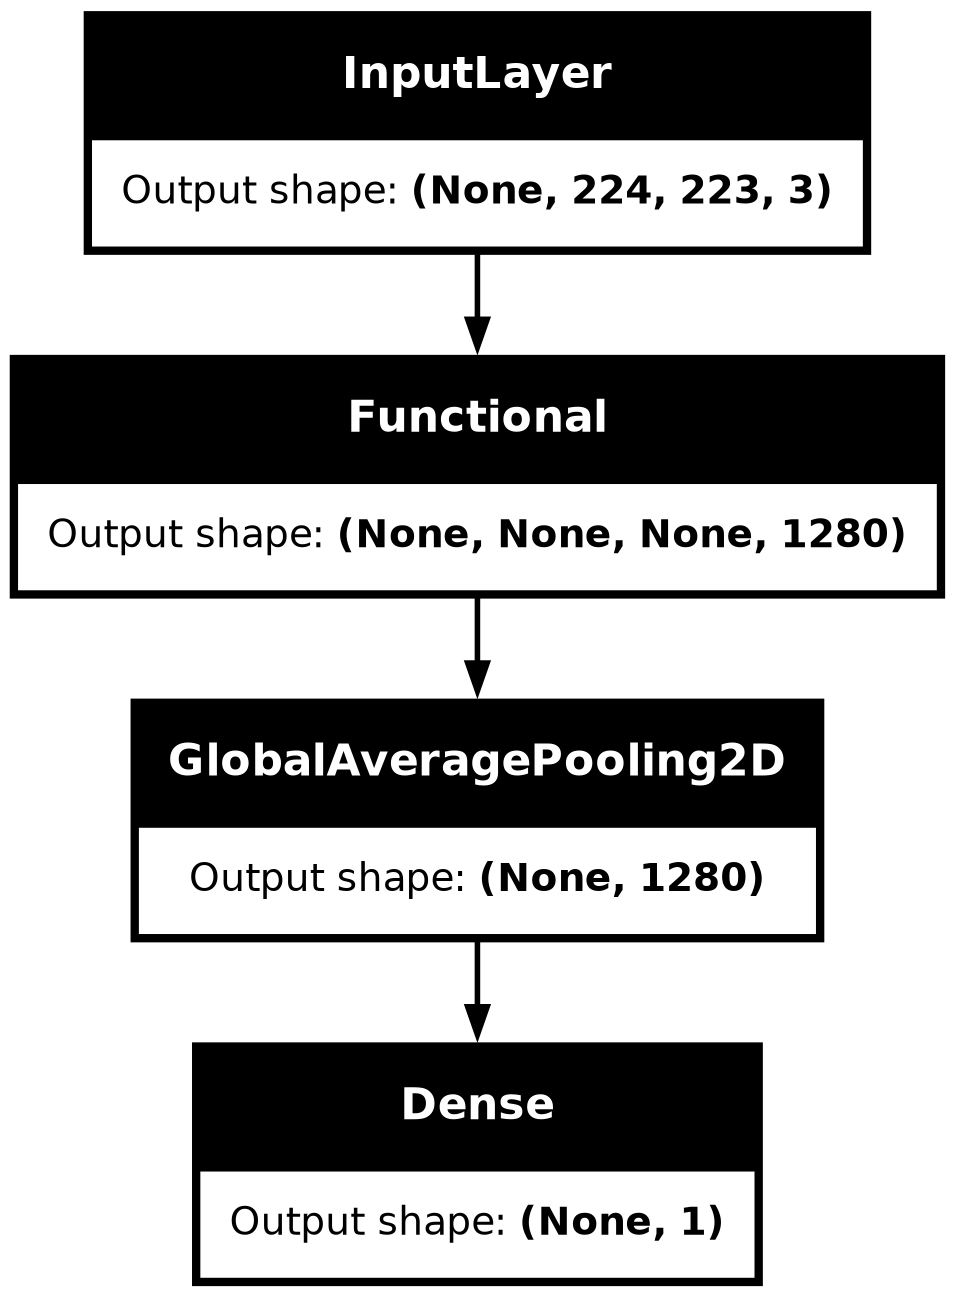

In [9]:
tf.keras.utils.plot_model(model_1, show_shapes=True)

In [10]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,
    monitor="val_loss"
)

In [14]:
history_1 = model_1.fit(train_data,
                        epochs=40,
                        validation_data=test_data,
                        callbacks=[early_stopping],
                        class_weight=class_weight)

Epoch 1/40
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 66s 48ms/step - accuracy: 0.8453 - loss: 1.5357e-05 - val_accuracy: 0.8418 - val_loss: 0.3789
Epoch 2/40
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 62s 45ms/step - accuracy: 0.8477 - loss: 1.5235e-05 - val_accuracy: 0.8299 - val_loss: 0.4017
Epoch 3/40
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.8485 - loss: 1.4971e-05 - val_accuracy: 0.8313 - val_loss: 0.4070
Epoch 4/40
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 62s 45ms/step - accuracy: 0.8482 - loss: 1.5209e-05 - val_accuracy: 0.8199 - val_loss: 0.4307
Epoch 5/40
1363/1363 ━━━━━━━━━━━━━━━━━━━━ 62s 45ms/step - accuracy: 0.8462 - loss: 1.5294e-05 - val_accuracy: 0.8277 - val_loss: 0.4124


In [15]:
model_1.evaluate(test_data)

343/343 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8298 - loss: 0.4090


[0.41246792674064636, 0.8277276158332825]

In [28]:
model_1.save("food_not_food_model_v1.h5")

ValueError: Unable to synchronously create dataset (name already exists)